In [3]:
#Import the modules
    
import imblearn
import numpy as np
import pandas as pd

from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import warnings

In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
import os

print(os.getcwd())  # Print the current working directory

C:\Users\zoeyli\Desktop\FinTech Bootcamp\Projects\Project 2


## Split the Data into Training and Testing Sets
Step 1: Read the lending_data.csv data from the Resources folder into a Pandas DataFrame.

In [12]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
loan_data_df =  pd.read_csv('./Resources/Loan_Train.csv')

# Review the DataFrame
loan_data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
# Separate the y variable, the labels
y = loan_data_df['Loan_Status']

# Separate the X variable, the features
X = loan_data_df.drop('Loan_Status', axis=1)

In [14]:
# Review the y variable Series
print(y)

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object


In [15]:
# Review the X variable DataFrame
print(X)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

## Step 3: Check the balance of the labels variable (y) by using the value_counts function.

In [16]:
# Check the balance of our target values
print(y.value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


## Step 4: Split the data into training and testing datasets by using train_test_split.

In [17]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Step 1: Fit a logistic regression model by using the training data (X_train and y_train).

In [18]:
import pandas as pd

# Load your dataset into a pandas DataFrame
loan_data_df =  pd.read_csv('Resources/Loan_Train.csv')

# Print the column names
print(loan_data_df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [19]:
# Separate the y variable (target) and the X variables (features)
y = loan_data_df['Loan_Status']
X = loan_data_df.drop(columns=['Loan_Status'])

In [20]:
loan_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [21]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Read the CSV file from the Resources folder into a Pandas DataFrame
loan_data_df =  pd.read_csv('Resources/Loan_Train.csv')

# Drop unnecessary columns or columns with non-numeric values
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])

# Separate the target variable (Loan_Status) and the features (X)
y = loan_data_df['Loan_Status']
X = loan_data_df.drop(columns=['Loan_Status'])

# Perform categorical encoding
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Handle missing values
X = X.fillna(X.mean())  # Replace missing values with column mean

# Scale the numeric columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate the Logistic Regression model
logreg = LogisticRegression(random_state=1)

# Fit the model using training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
balanced_acc = balanced_accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report_imbalanced(y_test, y_pred)

# Print the evaluation metrics
print("Balanced Accuracy:", balanced_acc)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

Balanced Accuracy: 0.6932234432234432
Confusion Matrix:
[[16 23]
 [ 2 82]]
Classification Report:
                   pre       rec       spe        f1       geo       iba       sup

          N       0.89      0.41      0.98      0.56      0.63      0.38        39
          Y       0.78      0.98      0.41      0.87      0.63      0.42        84

avg / total       0.82      0.80      0.59      0.77      0.63      0.41       123



## Step 2: Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.

In [22]:
# Make a prediction using the testing data
# Make predictions using the testing data
y_pred = logreg.predict(X_test)

## Step 3: Evaluate the model’s performance by doing the following:
Calculate the accuracy score of the model.

Generate a confusion matrix.

Print the classification report.

In [23]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7967479674796748
Confusion Matrix:
 [[16 23]
 [ 2 82]]
Classification Report:
               precision    recall  f1-score   support

           N       0.89      0.41      0.56        39
           Y       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123



## Predict a Logistic Regression Model with Resampled Training Data
Step 1: Use the RandomOverSampler module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points.

In [24]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random oversampler model
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [25]:
# Count the distinct values of the resampled labels data
import pandas as pd

# Count the distinct values of the resampled labels data
label_counts = pd.Series(y_train_resampled).value_counts()
print(label_counts)

N    338
Y    338
Name: Loan_Status, dtype: int64


## Step 2: Use the LogisticRegression classifier and the resampled data to fit the model and make predictions.

In [26]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
logreg_resampled = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
logreg_resampled.fit(X_train_resampled, y_train_resampled)

# Make a prediction using the testing data
y_pred_resampled = logreg_resampled.predict(X_test)

## Step 3: Evaluate the model’s performance by doing the following:
Calculate the accuracy score of the model.

Generate a confusion matrix.

Print the classification report.

In [27]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import balanced_accuracy_score

# Print the balanced accuracy score
balanced_accuracy_resampled = balanced_accuracy_score(y_test, y_pred_resampled)
print("Balanced Accuracy (Resampled):", balanced_accuracy_resampled)

Balanced Accuracy (Resampled): 0.7147435897435896


In [28]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
confusion_resampled = confusion_matrix(y_test, y_pred_resampled)
print("Confusion Matrix (Resampled):\n", confusion_resampled)

Confusion Matrix (Resampled):
 [[20 19]
 [ 7 77]]


In [29]:
# Print the classification report for the model
from sklearn.metrics import classification_report

# Print the classification report
report_resampled = classification_report(y_test, y_pred_resampled)
print("Classification Report (Resampled):\n", report_resampled)

Classification Report (Resampled):
               precision    recall  f1-score   support

           N       0.74      0.51      0.61        39
           Y       0.80      0.92      0.86        84

    accuracy                           0.79       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.78      0.79      0.78       123



## Apply adaBoost for a deeper look

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
adaBoost = AdaBoostClassifier()

# Train the classifier on the training data
adaBoost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaBoost.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.69      0.42      0.52        43
           Y       0.74      0.90      0.81        80

    accuracy                           0.73       123
   macro avg       0.72      0.66      0.67       123
weighted avg       0.72      0.73      0.71       123



## ill now try To further increase the performance metrics

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=5)

# Fit the data to perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
ada_boost = AdaBoostClassifier(**best_params)
ada_boost.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.01, n_estimators=100)

In [32]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model with resampled data
ada_boost.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(learning_rate=0.01, n_estimators=100)

##  By performing this oversampling and training, the code aims to improve the model's performance in correctly predicting the minority class and potentially increase metrics such as precision, recall, and F1-score for the minority class.

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = ada_boost.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Y')
recall = recall_score(y_test, y_pred, pos_label='Y')
f1 = f1_score(y_test, y_pred, pos_label='Y')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1-Score: 0.8586956521739131


## Conclusion : the boosted model demonstrates improved performance compared to the previous model, with higher precision, recall, and F1-score values. This indicates that the model is better at correctly classifying positive samples, while maintaining a reasonable level of correctness and balance between precision and recall.

## Data Visualization

In [34]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [38]:
# Read the loan credit dataset from a CSV file
df = pd.read_csv('Resources/Loan_Train.csv')
display(df.head())
display(df.tail())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [39]:
# Review the data types associated with the columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [40]:
# Encode categorical variables

# Create a list of categorical variables 
categorical_variables = list(df.dtypes[df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [43]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [45]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(df[categorical_variables])

C:\Users\zoeyli\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)

# Review the DataFrame
encoded_df.head()

,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001018,Loan_ID_LP001020,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [47]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
numerical_variables_df = df.drop(columns = categorical_variables)
concat_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)


# Review the Dataframe
display(concat_df.head())
display(concat_df.tail())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4583,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.0,360.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2583,2358.0,120.0,360.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6000,0.0,141.0,360.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
609,2900,0.0,71.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
610,4106,0.0,40.0,180.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
611,8072,240.0,253.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
612,7583,0.0,187.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
613,4583,0.0,133.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


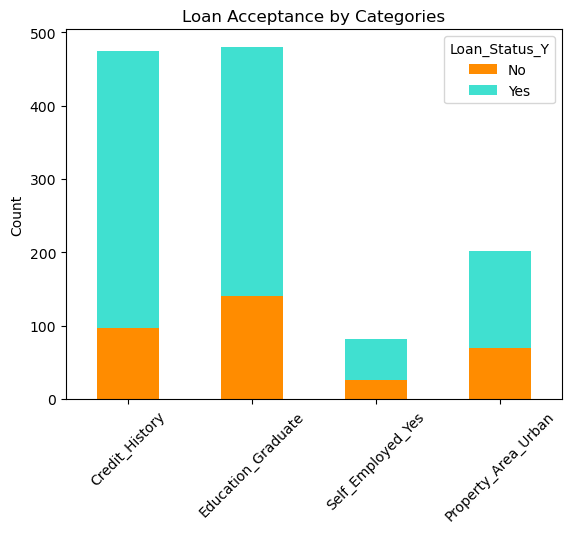

In [48]:
# Select the columns representing loan acceptance and other categories
columns = ['Loan_Status_Y', 'Credit_History', 'Education_Graduate', 'Self_Employed_Yes', 'Property_Area_Urban']

# Create a new DataFrame with the selected columns
subset_df = concat_df[columns]

# Replace the values of Loan_Status_Y
subset_df.loc[subset_df['Loan_Status_Y'] == 0.0, 'Loan_Status_Y'] = 'No'
subset_df.loc[subset_df['Loan_Status_Y'] == 1.0, 'Loan_Status_Y'] = 'Yes'

# Calculate the count of loan acceptance for each category
counts = subset_df.groupby('Loan_Status_Y').sum().T

# Set custom colors for the bars
colors = ['darkorange', 'turquoise']

# Create a stacked bar chart
ax = counts.plot(kind='bar', stacked=True, color=colors)

# Set labels and title
plt.ylabel('Count')
plt.title('Loan Acceptance by Categories')

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Display the plot
plt.show()